In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import activations
from tensorflow.keras.utils import model_to_dot
import os
from PIL import Image
import cv2 
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, activations
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.python.keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount("/content/drive")
from google.colab.patches import cv2_imshow

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


import random

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# data= np.load("/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/MelSpectrograms_Uni_imgs.npy")
# labels=np.load("/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/MelSpectrograms_Uni_lbls.npy")

In [4]:
data_paths= os.listdir("/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/Melspectrograms_Again_Uni")

In [5]:
split_ratio = 0.7  # Split ratio for the first subset

split_index = int(len(data_paths) * split_ratio)
random.shuffle(data_paths)

TrainSet = data_paths[:split_index]
RemSet = data_paths[split_index:]

print(len(TrainSet))
print(len(RemSet))

1007
433


In [6]:
split_ratio = 0.5  # Split ratio for the first subset

split_index = int(len(RemSet) * split_ratio)
random.shuffle(RemSet)

TestSet = RemSet[:split_index]
ValidSet = RemSet[split_index:]

print(len(TestSet))
print(len(ValidSet))

216
217


In [7]:
# X_train, X_rem, y_train, y_rem = train_test_split(data,labels,test_size=0.5,shuffle=True)


In [8]:
# X_test, X_valid, y_test, y_valid= train_test_split(X_rem,y_rem,test_size=0.5,shuffle=True)


In [9]:
PNdata_path="/content/drive/MyDrive/EmotionDetectionProject/Datasets/leen-spec/RAVDESS_NOISY"

In [10]:
# #PNNNNNN
# PNimgs=[]
# PNlbls=[]
# PN_dir= "/content/drive/MyDrive/EmotionDetectionProject/Datasets/leen-spec/RAVDESS_NOISY/"

# for fileP in TrainSet:

#   fileN=fileP.split("/")[-1].split(".")[0]
#   #print(fileN)
#   emo=int(fileN.split("-")[2])
#   #print(emo)
  
#   PNfileN= PN_dir + fileN + "_processed.png"
#   img= cv2.imread(PNfileN)
#   PNimgs.append(img)
#   PNlbls.append(emo)
  

In [12]:
# np.save("/content/drive/MyDrive/EmotionDetectionProject/Code/2D CNN/leen-spec-PN/leen-spec-PN_images.npy",PNimgs)
# np.save("/content/drive/MyDrive/EmotionDetectionProject/Code/2D CNN/leen-spec-PN/leen-spec-PN_labels.npy",PNlbls)

In [13]:
PNdata=np.load("/content/drive/MyDrive/EmotionDetectionProject/Code/2D CNN/leen-spec-PN/leen-spec-PN_images.npy")
PNlabels=np.load("/content/drive/MyDrive/EmotionDetectionProject/Code/2D CNN/leen-spec-PN/leen-spec-PN_labels.npy")

In [14]:
PNimgs=np.array(PNimgs)
PNlbls=np.array(PNlbls)

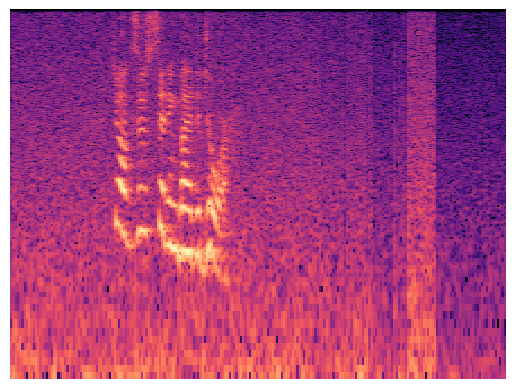

In [15]:
cv2_imshow(PNimgs[100])

In [16]:
print(PNimgs.shape)
print(PNlbls.shape)

(1007, 389, 515, 3)
(1007,)


In [17]:
PNlbls.dtype

dtype('int64')

In [ ]:

# Train_imgs=[]
# Train_lbls=[]
# Train_dir= "/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/Melspectrograms_Again_Uni/"

# for fileP in TrainSet:

#   fileN=fileP.split("/")[-1]
#   #print(fileN)
#   emo=int(fileN.split("-")[2])
#   #print(emo)
  
#   fileName= Train_dir + fileN 
#   img= cv2.imread(fileName)
#   Train_imgs.append(img)
#   Train_lbls.append(emo)
  

In [ ]:
# np.save("/content/drive/MyDrive/EmotionDetectionProject/Code/2D CNN/leen-spec-PN/Train1007_clean_images.npy",Train_imgs)
# np.save("/content/drive/MyDrive/EmotionDetectionProject/Code/2D CNN/leen-spec-PN/Train1007_clean_labels.npy",Train_lbls)

In [18]:
Train_imgs=np.load("/content/drive/MyDrive/EmotionDetectionProject/Code/2D CNN/leen-spec-PN/Train1007_clean_images.npy")
Train_lbls= np.load("/content/drive/MyDrive/EmotionDetectionProject/Code/2D CNN/leen-spec-PN/Train1007_clean_labels.npy")

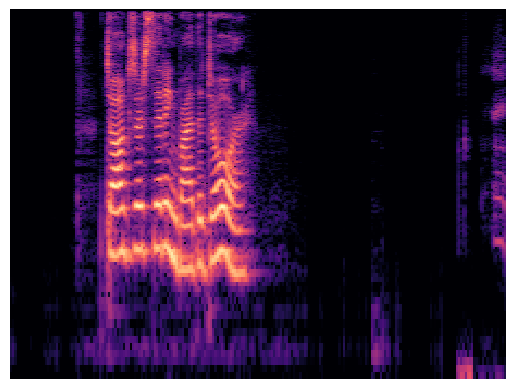

In [19]:
cv2_imshow(Train_imgs[100])

In [20]:
X_train= np.concatenate((Train_imgs,PNimgs))
y_train= np.concatenate((Train_lbls,PNlbls))

In [21]:

Test_imgs=[]
Test_lbls=[]
Test_dir= "/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/Melspectrograms_Again_Uni/"

for fileP in TestSet:

  fileN=fileP.split("/")[-1]
  #print(fileN)
  emo=int(fileN.split("-")[2])
  #print(emo)
  
  fileName= Test_dir + fileN 
  img= cv2.imread(fileName)
  Test_imgs.append(img)
  Test_lbls.append(emo)

In [22]:
print(len(Test_imgs))

216


In [43]:
np.save("/content/drive/MyDrive/EmotionDetectionProject/Code/2D CNN/leen-spec-PN/Train1007_X_test.npy",Test_imgs)
np.save("/content/drive/MyDrive/EmotionDetectionProject/Code/2D CNN/leen-spec-PN/Train1007_y_test.npy",Test_lbls)

In [44]:
X_test=np.load("/content/drive/MyDrive/EmotionDetectionProject/Code/2D CNN/leen-spec-PN/Train1007_X_test.npy")
y_test=np.load("/content/drive/MyDrive/EmotionDetectionProject/Code/2D CNN/leen-spec-PN/Train1007_y_test.npy")

In [24]:
print(X_test.shape)

(216, 389, 515, 3)


In [25]:

Valid_imgs=[]
Valid_lbls=[]
Valid_dir= "/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/Melspectrograms_Again_Uni/"

for fileP in ValidSet:

  fileN=fileP.split("/")[-1]
  #print(fileN)
  emo=int(fileN.split("-")[2])
  #print(emo)
  
  fileName= Valid_dir + fileN 
  img= cv2.imread(fileName)
  Valid_imgs.append(img)
  Valid_lbls.append(emo)

In [45]:
np.save("/content/drive/MyDrive/EmotionDetectionProject/Code/2D CNN/leen-spec-PN/Train1007_X_valid.npy",Valid_imgs)
np.save("/content/drive/MyDrive/EmotionDetectionProject/Code/2D CNN/leen-spec-PN/Train1007_y_valid.npy",Valid_lbls)

In [46]:
X_valid=np.load("/content/drive/MyDrive/EmotionDetectionProject/Code/2D CNN/leen-spec-PN/Train1007_X_valid.npy")
y_valid=np.load("/content/drive/MyDrive/EmotionDetectionProject/Code/2D CNN/leen-spec-PN/Train1007_y_valid.npy")

In [27]:
X_train=np.array([cv2.resize(i,(256,256)) for i in X_train])
X_test=np.array([cv2.resize(i,(256,256)) for i in X_test])
X_valid=np.array([cv2.resize(i,(256,256)) for i in X_valid])


In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_valid.shape)
print(y_valid.shape)

(2014, 256, 256, 3)
(216, 256, 256, 3)
(2014,)
(216,)
(217, 256, 256, 3)
(217,)


In [29]:
len(np.unique(y_train))

8

In [30]:
len(np.unique(y_test))

8

In [31]:
y_train

array([2, 7, 5, ..., 6, 7, 6])

In [32]:
X_train[0].dtype

dtype('uint8')

In [33]:
X_train= X_train.astype(np.float32)
X_test= X_test.astype(np.float32)
X_valid= X_valid.astype(np.float32) 

In [34]:
X_train[0].dtype

dtype('float32')

In [35]:

# NORMALIZE DATA

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/(std+ 1e-8)
X_test = (X_test - mean)/(std+ 1e-8)
X_valid = (X_valid - mean)/(std+ 1e-8)
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_valid = np.array(X_valid)
y_valid= np.array(y_valid)
# ONE HOT ENCODE THE TARGET
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))#, num_classes=6)
y_test = to_categorical(lb.fit_transform(y_test))#, num_classes=8)
y_valid = to_categorical(lb.fit_transform(y_valid))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR 
# X_train = X_train[:,:,:,np.newaxis]
# X_test = X_test[:,:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
(2014, 256, 256, 3)
(216, 256, 256, 3)
(2014, 8)
(216, 8)


(2230, 8)

In [36]:
X_train=np.array([i.astype(np.uint8) for i in X_train])
X_test=np.array([i.astype(np.uint8) for i in X_test])
X_valid=np.array([i.astype(np.uint8) for i in X_valid])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 384)     10752     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 384)    0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 384)    1536      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 256)     2457856   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 256)      0         
 2D)                                                             
                                                        

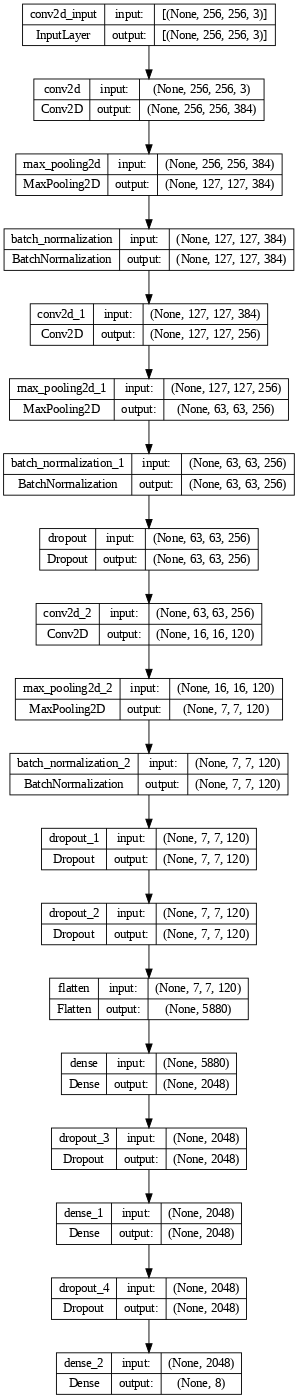

In [37]:
model = models.Sequential()
#model.add(layers.Conv2D(filters=256, kernel_size=11, strides=4, activation='relu', input_shape=(256, 256, 3), padding='same'))
model.add(layers.Conv2D(384, kernel_size=3, activation='relu', padding='same', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((3,3),strides=2))
model.add(BatchNormalization())


model.add(layers.Conv2D(256, kernel_size=5,activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3,3),strides=2))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))


 
model.add(layers.Conv2D(filters=120, kernel_size=11, strides=4,activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3, 3), strides=2))
model.add(BatchNormalization())

model.add(layers.Dropout(0.5))

# model.add(layers.Conv2D(filters=256, kernel_size=11, strides=1, activation='relu', padding='same'))
# model.add(layers.MaxPooling2D((3, 3), strides=(1, 1)))
# model.add(BatchNormalization())

# model.add(layers.Dropout(0.5))



# model.add(layers.Conv2D(128, kernel_size=11,activation='relu', padding='same'))
# model.add(layers.MaxPooling2D((3,3),strides=1))
# model.add(BatchNormalization())
# model.add(layers.Dropout(0.5))


# model.add(layers.Conv2D(filters=256, kernel_size=11, strides=1, activation='relu', padding='same'))
# model.add(layers.MaxPooling2D((3, 3), strides=(1, 1)))
# model.add(BatchNormalization())

# model.add(layers.Dropout(0.5))

# model.add(layers.Conv2D(128, kernel_size=11, activation='relu', padding='same'))
# model.add(layers.MaxPooling2D((3,3),strides=1))
# model.add(BatchNormalization())

# model.add(layers.Dropout(0.5))

# model.add(layers.Conv2D(64, kernel_size=11, activation='relu', padding='same'))
# model.add(layers.MaxPooling2D((3,3),strides=1))
# model.add(BatchNormalization())

model.add(layers.Dropout(0.5))
#3 FC layers

model.add(layers.Flatten()) 
# model.add(layers.Dense(1024, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(500, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.5))

model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation='softmax'))

print(model.summary())
plot_model(model, show_shapes=True,dpi = 65)

In [38]:

model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In paper: The training process was run for 30 epochs with a batch size set to 100. Initial learning rate was set to 0.01 with a decay of 0.1 after each 10 epochs.

In [39]:
history = model.fit(X_train, y_train, batch_size=32, epochs=300,validation_data=(X_valid,y_valid))

Epoch 1/300
63/63 [==============================] - 331s 3s/step - loss: 5.2107 - accuracy: 0.1634 - val_loss: 5.4957 - val_accuracy: 0.1475
Epoch 2/300
63/63 [==============================] - 9s 137ms/step - loss: 2.3172 - accuracy: 0.2071 - val_loss: 2.0310 - val_accuracy: 0.2304
Epoch 3/300
63/63 [==============================] - 9s 137ms/step - loss: 2.1588 - accuracy: 0.2219 - val_loss: 1.8907 - val_accuracy: 0.2350
Epoch 4/300
63/63 [==============================] - 9s 138ms/step - loss: 2.0083 - accuracy: 0.2527 - val_loss: 1.8358 - val_accuracy: 0.2949
Epoch 5/300
63/63 [==============================] - 9s 137ms/step - loss: 1.9790 - accuracy: 0.2607 - val_loss: 1.8256 - val_accuracy: 0.2857
Epoch 6/300
63/63 [==============================] - 9s 137ms/step - loss: 1.9078 - accuracy: 0.2761 - val_loss: 1.7725 - val_accuracy: 0.3364
Epoch 7/300
63/63 [==============================] - 9s 138ms/step - loss: 1.8428 - accuracy: 0.2969 - val_loss: 1.7105 - val_accuracy: 0.3410


In [40]:
results = model.evaluate(X_test, y_test, batch_size=1)
print("test loss, test acc:", results)

216/216 [==============================] - 1s 4ms/step - loss: 0.9053 - accuracy: 0.8750
test loss, test acc: [0.9053296446800232, 0.875]


1/7 [===>..........................] - ETA: 0s - loss: 0.5449 - accuracy: 0.8438

<ipython-input-41-e8a49140214f>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-darkgrid'])
<ipython-input-41-e8a49140214f>:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-darkgrid'])


7/7 [==============================] - 1s 239ms/step - loss: 0.9053 - accuracy: 0.8750
Loss of the model is -  0.9052811861038208
7/7 [==============================] - 0s 41ms/step - loss: 0.9053 - accuracy: 0.8750
Accuracy of the model is -  87.5 %


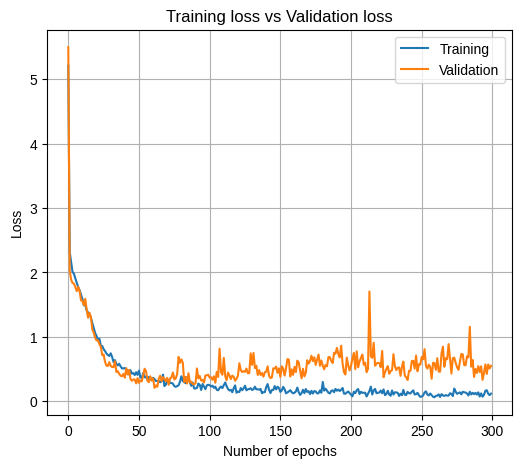

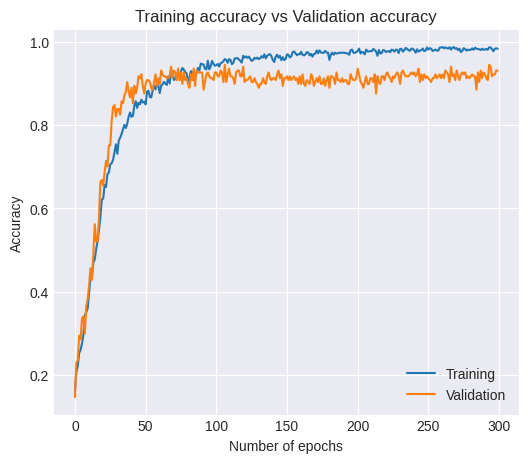

In [41]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 100 
plt.figure(1,figsize=(6,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 100 
plt.figure(2,figsize=(6,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%") 


In [42]:
model.save("/content/drive/MyDrive/EmotionDetectionProject/Models/2DCNN_PAPERarch_PN_{}.h5",save_format='h5')